# Fourier Transform of Dirac Delta and Unit Functions

In [1]:
# Fourier Transform: Dirac Delta and Unit Functions
# -----------------------------------------------------------------------------
# This script demonstrates the Fourier transform pair relationship between the
# Dirac delta function and the unit function. The Dirac delta function is a
# distribution with an 'infinite' spike at a single point and integrates to 1,
# while the unit function is a constant function.

# To help us understand how the FFT algorithm works, we can perform the
# fourier transform on functions that we already have an analytical
# solution to and then compare.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

## STEP 1: Parameters 

In [3]:
## STEP 1: Grids
# Since we are working with a numerical algorithm we need an appropriate
# grid over which to work. As a rule its always best to define the number
# of grid points to be a power of 2. 

# Essentially there are two grids we need to consider:
#   - Real space
#   - Fourier space

# These two grids are related through the Nyquist relation. But which
# version of the relation depends on which space we are working in:
#   1. Pulse Space
#   dx * dxi = 2*pi/N
#
#   2. Frequency Space
#   dx * dnu = 1/N

# The difference lies in the factor 2*pi and we need to be careful to
# understand which one is correct.

# GRID IN REAL SPACE
N = 1024  # Number of grid points - determines the resolution in both real and Fourier spaces
dx = 0.1 # Grid step in real space - spacing between individual points
x = dx * np.arange(-N / 2, N / 2)  # Grid in x real  space
L = N * dx  # Upper truncation limit in real space


# GRID IN FOURIER SPACE (Pulsation)
dxi = (2*np.pi)/(N*dx) # Grid step size in fourier space / Spacing of the xi grid; Nyquist relation: Dx*Dxi = 2*pi/N
upperxi = N*dxi # Upper truncation limit in fourier space ; W = 2*pi/dx
xi = dxi * np.arange(-N / 2, N / 2) # Grid in fourier space

# GRID IN FOURIER SPACE (Frequency)
dnu = 1/(N*dx) # Grid step size in fourier space
uppernu = N*dnu # Upper truncation limit in fourier space
nu = dnu * np.arange(-N / 2, N / 2) # Grid in fourier space

## STEP 2: Analytical Expressions

In [4]:
# ANALYTICAL expressions
# -----------------------------

# Create Dirac Delta Function in Time Domain
# Dirac delta function is represented as a spike at zero with all other values being zero.
# Ideally, the spike should have infinite height, but we use 1/dx for practical purposes.
fa = np.zeros(N)
fa[N // 2] = 1 / dx  # High value at the center to simulate a delta function

# Uniform Functions (Constant functions in Fourier Space)
# The Fourier transform of a Dirac Delta function is a constant function.
Fa_p = np.ones(N)  # Constant function in pulsation space
Fa_f = np.ones(N)  # Constant function in frequency space

## STEP 3: Numerical Approximation

In [5]:
# NUMERICAL approximations
# -----------------------------
# Unfortunately, the definition of the FFT algorithm uses a different
# format for the Fourier Transform. Where we are used to the the FT having
# a positive exponent and FT^-1 having a negative component, the algorithm
# does the opposite, meaning we need to use:
#   ifft for our Fourier Transform
#    fft for our inverse Fourier Transform

# The algorithm was also designed such that the point 0 is the further left
# grid point, i.e. index(1). But our grid is symmetrically defined over the
# interval [-N/2:N/2], so we need to use the i/fftshift function.
# This works by swapping the positions of the vector to put the zero
# position in the 'correct' place. E.g.
# [-3,-2,-1,0,1,2] ---> [0,1,2,-3,-2,-1]
# But we need to undo this correction afterwards

Fn = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fa))) * L
# Fn is the numerical Fourier transform of the function 'fa'. It is calculated
# using FFT. The fftshift operation is used to shift the zero-frequency
# component to the center of the spectrum.

fn_p = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fa_p))) / L
fn_f = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fa_f))) / L
# fn is the numerical inverse Fourier transform of 'Fa_p'. This operation is
# intended to transform the frequency domain representation back to the
# time domain (or original function space).


# Computing the Fourier transform and its inverse using different normalization factors
Fn1 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(fa))) * dx
# Fn1 is similar to 'Fn' but scaled by dx instead of upper limit. This affects the
# amplitude of the transformed function, demonstrating the impact of scaling
# in the Fourier transform.

fn1_p = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(Fa_p))) / dx
fn1_f = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(Fa_f))) / dx
# fn1 is the scaled inverse Fourier transform of 'Fa_p', similar to 'fn' but
# scaled by dx instead of upper limit. This represents the inverse operation to Fn1, showing how
# the function transforms back with the scaling factor.

## ALT: DTF Version

In [6]:
###############################################
# Frequency version for Dirac Delta to Unit Function

# Initialize arrays for DFT and IDFT results
Fn2_f = np.zeros(N, dtype=complex)  # DFT result array
fn2_f = np.zeros(N, dtype=complex)  # IDFT result array

# Compute the DFT of the Dirac Delta function
for j in range(N):  # Iterating over each frequency bin 'j'
    for k in range(N):  # Iterating over each time point 'k'
        # The DFT of a Dirac Delta is a constant function
        Fn2_f[j] += np.exp(1j * 2 * np.pi * j * k / N) * fa[k] * dx

# Compute the IDFT to retrieve the original function
for n in range(N):  # Iterating over each time point 'n'
    for k in range(N):  # Iterating over each frequency bin 'k'
        fn2_f[n] += Fn2_f[k] * np.exp(-1j * 2 * np.pi * k * n / N)

# Normalize the IDFT result
fn2_f /= N


# Pulsation version for Dirac Delta to Unit Function
# Initialize arrays for DFT and IDFT results
Fn2_p = np.zeros(N, dtype=complex)  # DFT result array
fn2_p = np.zeros(N, dtype=complex)  # IDFT result array

# Compute the DFT of the Dirac Delta function
for j in range(N):  # Iterating over each frequency bin 'j'
    for k in range(N):  # Iterating over each time point 'k'
        # The DFT of a Dirac Delta is a constant function
        Fn2_p[j] += np.exp(1j * xi[j] * x[k]) * fa[k] * dx

# Compute the IDFT to retrieve the original function
for n in range(N):  # Iterating over each time point 'n'
    for k in range(N):  # Iterating over each frequency bin 'k'
        fn2_p[n] += Fn2_p[k] * np.exp(-1j * xi[k] * x[n])

# Normalize the IDFT result
fn2_p /= N * dx


## STEP 4: Plotting

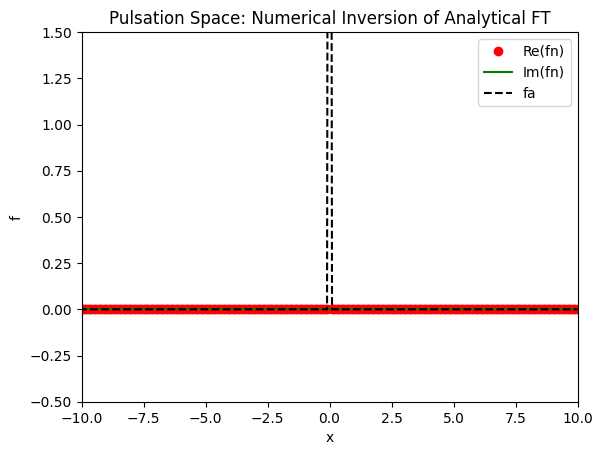

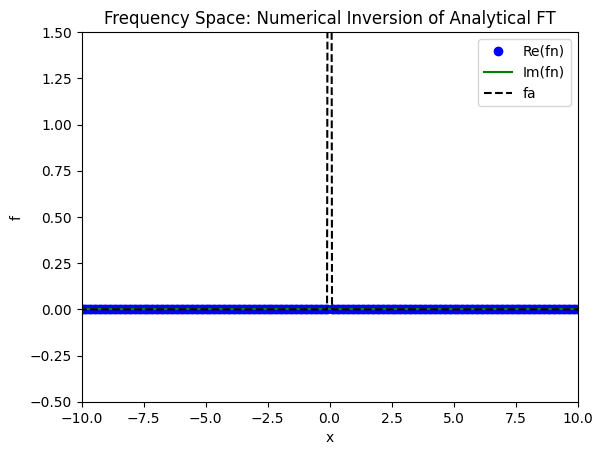

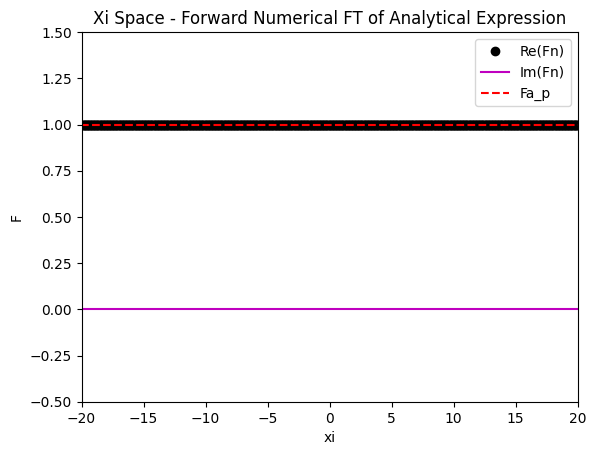

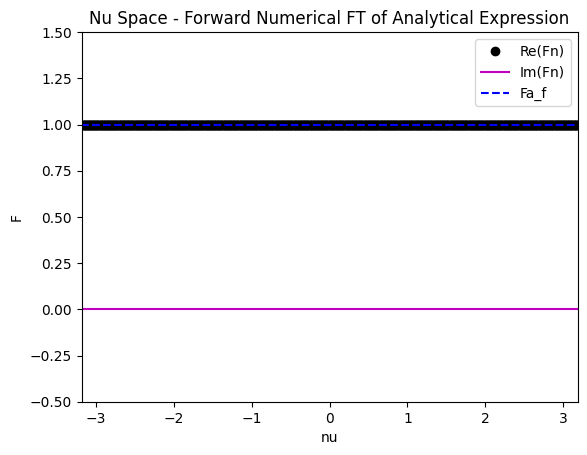

In [7]:
# STEP 3: Graphical Check

# Plot 1: Inverse Fourier Transform in Pulsation Space
# This plot is used to compare the numerically inverted Fourier transform (in pulsation space) with the original Gaussian function.
plt.figure(1)
plt.plot(x, fn_p.real, 'ro', label='Re(fn)')  # Plot the real part of the inverse Fourier transform (fn_p)
plt.plot(x, fn_p.imag, 'g', label='Im(fn)')  # Plot the imaginary part of the inverse Fourier transform (fn_p)
plt.plot(x, fa, '--k', label='fa')  # Plot the original Gaussian function for comparison
plt.title('Pulsation Space: Numerical Inversion of Analytical FT')  # Title indicating this is the inverse FT in pulsation space
plt.xlabel('x')  # Label for the x-axis
plt.ylabel('f')  # Label for the y-axis
plt.legend()  # Show legend to identify the plots
plt.axis([-10, 10, -0.5, 1.5])  # Set the axis limits for better visualization

# Plot 2: Inverse Fourier Transform in Frequency Space
# This plot is similar to Plot 1 but for frequency space. It compares the inverse Fourier transform in frequency space 
# with the original Gaussian.
plt.figure(2)
plt.plot(x, fn_f.real, 'bo', label='Re(fn)')  # Plot the real part of the inverse Fourier transform (fn_f)
plt.plot(x, fn_f.imag, 'g', label='Im(fn)')  # Plot the imaginary part of the inverse Fourier transform (fn_f)
plt.plot(x, fa, '--k', label='fa')  # Plot the original Gaussian function for comparison
plt.title('Frequency Space: Numerical Inversion of Analytical FT')  # Title indicating this is the inverse FT in frequency space
plt.xlabel('x')  # Label for the x-axis
plt.ylabel('f')  # Label for the y-axis
plt.legend()  # Show legend to identify the plots
plt.axis([-10, 10, -0.5, 1.5])  # Set the axis limits for better visualization

# Plot 3: Forward Fourier Transform in Pulsation Space
# This plot shows the forward Fourier transform of the Gaussian in real space and compares it with its analytical form in pulsation space.
plt.figure(3)
plt.plot(xi, Fn.real, 'ko', label='Re(Fn)')  # Plot the real part of the Fourier transform (Fn)
plt.plot(xi, Fn.imag, 'm', label='Im(Fn)')  # Plot the imaginary part of the Fourier transform (Fn)
plt.plot(xi, Fa_p, '--r', label='Fa_p')  # Plot the analytical Gaussian in pulsation space for comparison
plt.title('Xi Space - Forward Numerical FT of Analytical Expression')  # Title indicating this is the FT in pulsation space
plt.xlabel('xi')  # Label for the xi-axis
plt.ylabel('F')  # Label for the F-axis
plt.legend()  # Show legend to identify the plots
plt.axis([-20, 20, -0.5, 1.5])  # Set the axis limits for better visualization

# Plot 4: Forward Fourier Transform in Frequency Space
# This plot is similar to Plot 3 but for frequency space. It shows the forward Fourier transform of the Gaussian 
# in real space and compares it with its analytical form in frequency space.
plt.figure(4)
plt.plot(nu, Fn.real, 'ko', label='Re(Fn)')  # Plot the real part of the Fourier transform (Fn)
plt.plot(nu, Fn.imag, 'm', label='Im(Fn)')  # Plot the imaginary part of the Fourier transform (Fn)
plt.plot(nu, Fa_f, '--b', label='Fa_f')  # Plot the analytical Gaussian in frequency space for comparison
plt.title('Nu Space - Forward Numerical FT of Analytical Expression')  # Title indicating this is the FT in frequency space
plt.xlabel('nu')  # Label for the nu-axis
plt.ylabel('F')  # Label for the F-axis
plt.legend()  # Show legend to identify the plots
plt.axis([-10/np.pi, 10/np.pi, -0.5, 1.5])  # Set the axis limits for better visualization

plt.show()